In [2]:
import pandas as pd
pc=pd.read_csv("../new_principal_components.csv")
pc0=pc[pc['type']==0]
pc1=pc[pc['type']==1]

/tmp/ipykernel_2610/3896356307.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5, 5))


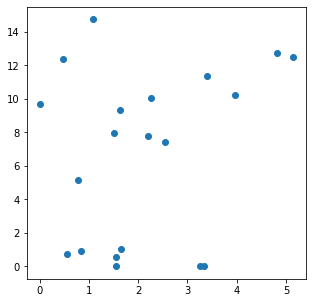

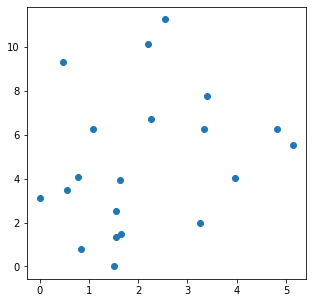

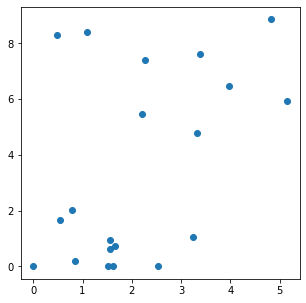

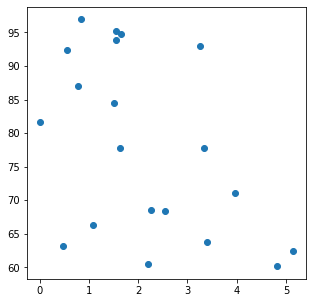

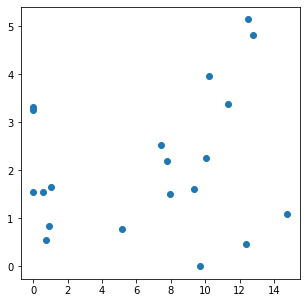

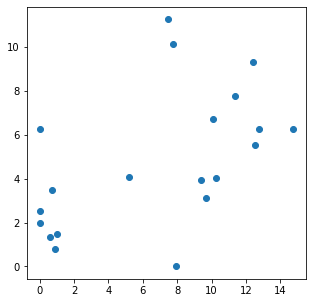

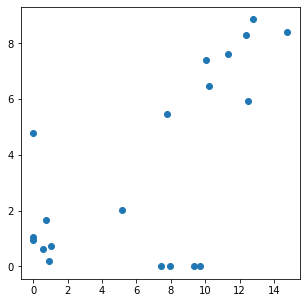

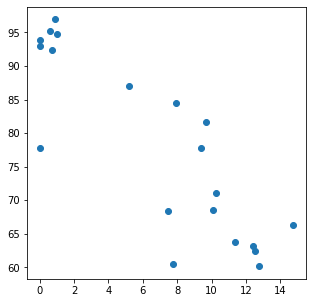

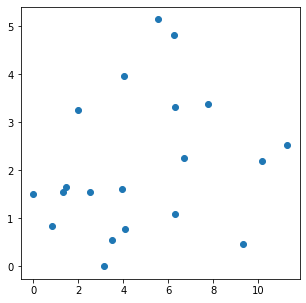

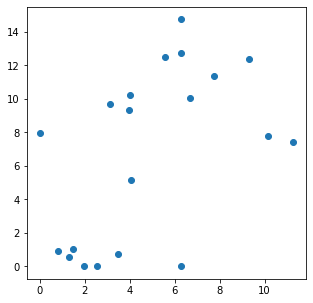

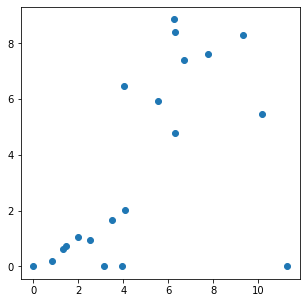

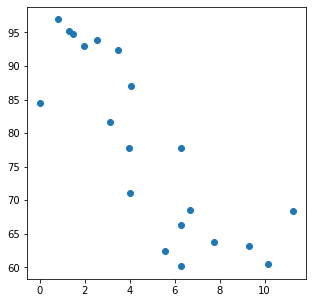

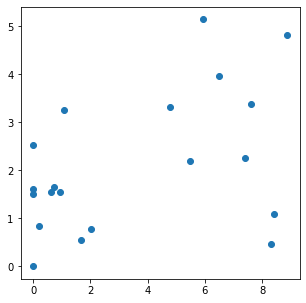

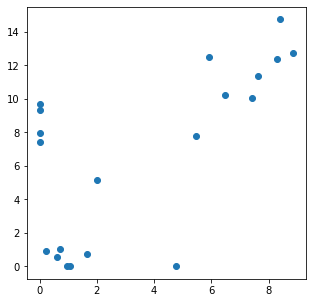

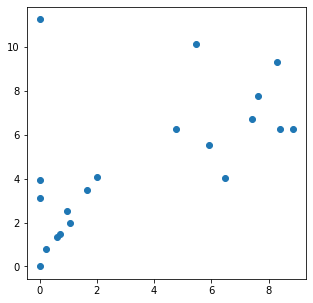

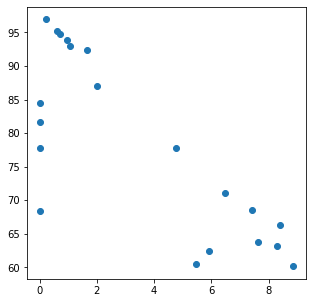

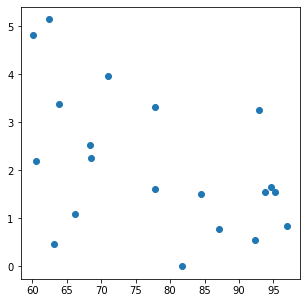

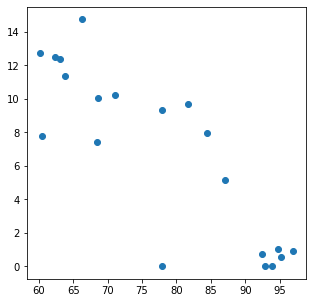

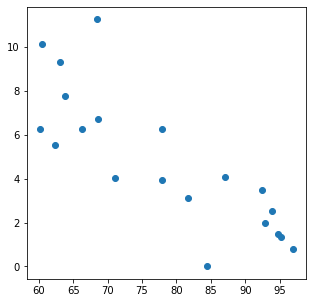

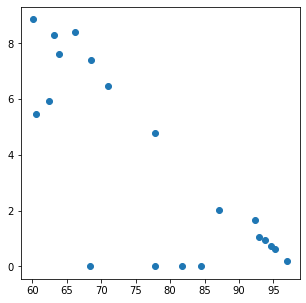

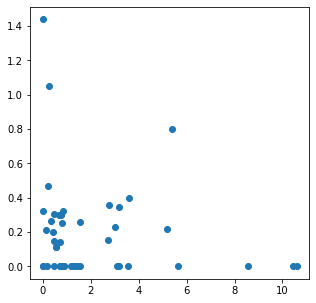

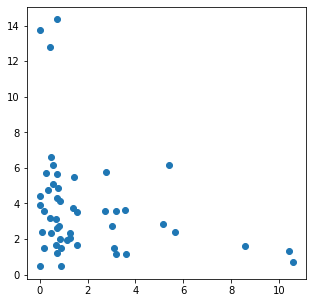

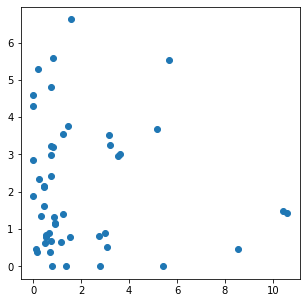

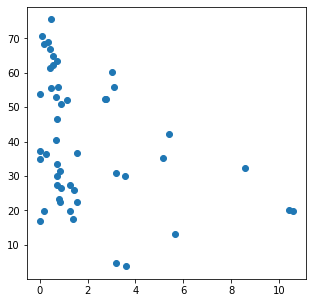

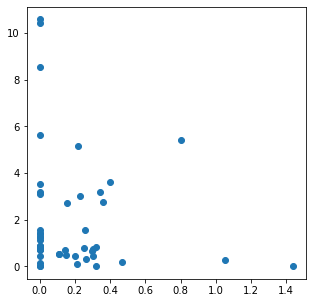

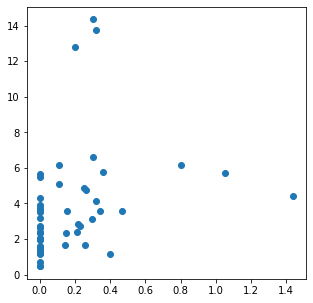

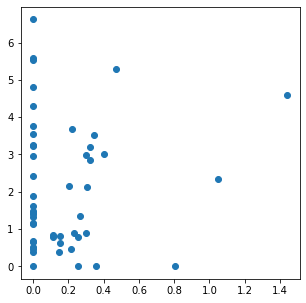

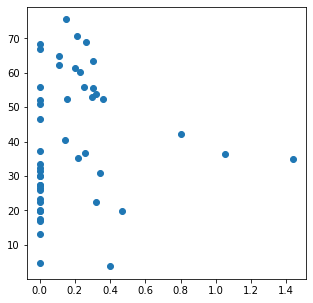

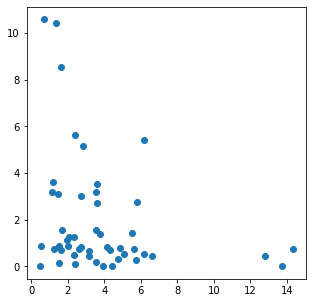

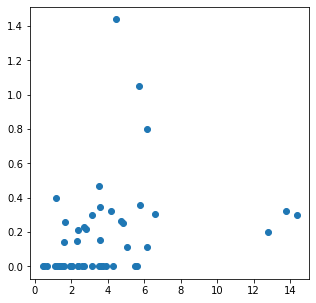

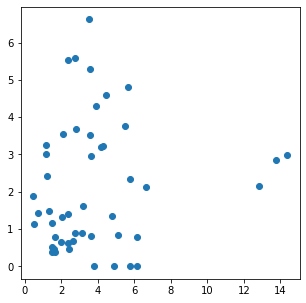

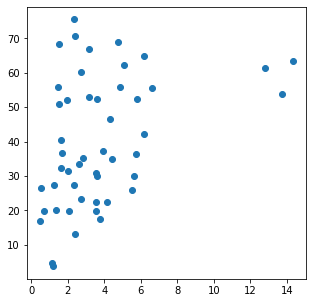

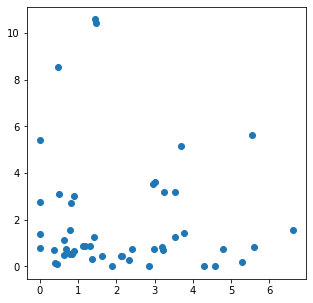

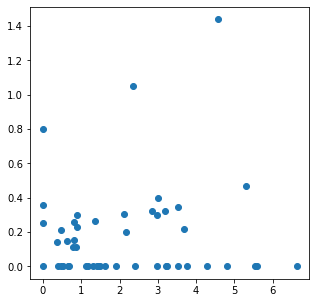

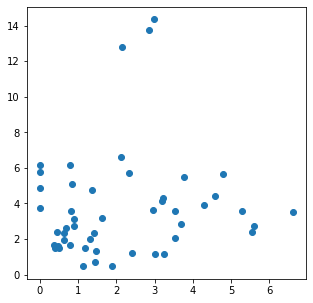

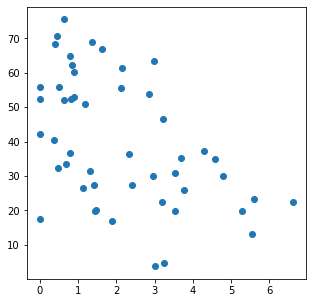

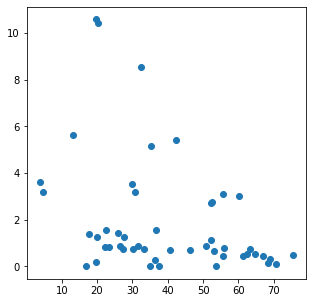

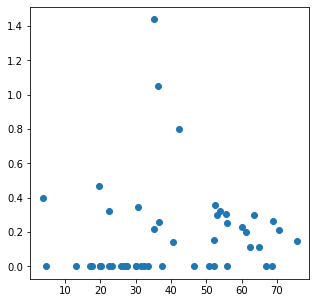

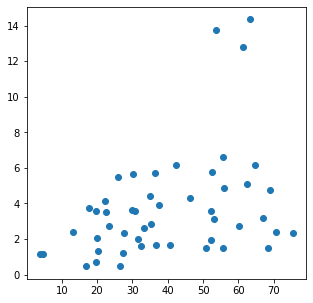

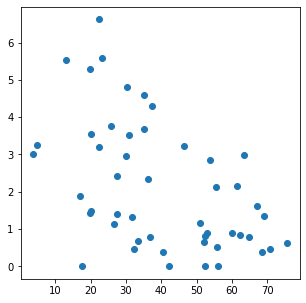

In [3]:
import os

os.system("rm ./pa_plot/*")

import matplotlib.pyplot as plt
for name1 in pc1.columns[1:]:
    for name2 in pc1.columns[1:]:
        if name1 != name2:
            plt.figure(figsize=(5, 5))
            plt.scatter(x=pc1[name1], y=pc1[name2])
            plt.savefig("./pa_plot/1_{}_{}.png".format(name1, name2))
            
            
for name1 in pc0.columns[1:]:
    for name2 in pc0.columns[1:]:
        if name1 != name2:
            plt.figure(figsize=(5, 5))
            plt.scatter(x=pc0[name1], y=pc0[name2])
            plt.savefig("./pa_plot/0_{}_{}.png".format(name1, name2))


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score



# max_sil = -10000
# max_cal = -10000
# max_name1 = ''
# max_name2 = ''
# max_k
for name1 in pc0.columns[1:]:
    for name2 in pc0.columns[1:]:
        if name1 != name2:
            for k in range(2, 7):
                # 聚类数量
                x = pc0[[name1, name2]]
                cluster = KMeans(n_clusters=k, random_state=10).fit(x)
                # 访问labels_属性，获得聚类结果
                y_pred = cluster.labels_
                centroid = cluster.cluster_centers_
                # 计算平均轮廓系数
                sil = silhouette_score(x, y_pred)
                # 值越大，说明同类样本相距约近，不同样本相距越远，则聚类效果越好
                cal = calinski_harabasz_score(x, y_pred)
                # 结果值越大，聚类效果越好

                print("类别1：{}类别2：{}k：{}轮廓系数：{}cal系数：{}".format(name1, name2, k, sil, cal))


类别1：cuo类别2：kok：2轮廓系数：0.7550365392244225cal系数：125.30640506080684
类别1：cuo类别2：kok：3轮廓系数：0.7386326743018893cal系数：255.98606082632818
类别1：cuo类别2：kok：4轮廓系数：0.7332160613242745cal系数：313.9270151882339
类别1：cuo类别2：kok：5轮廓系数：0.5063476041615449cal系数：361.37102241864255
类别1：cuo类别2：kok：6轮廓系数：0.5035215124485728cal系数：396.64341999840923
类别1：cuo类别2：alok：2轮廓系数：0.6862623685179257cal系数：35.461913498441284
类别1：cuo类别2：alok：3轮廓系数：0.6092850971942765cal系数：60.62986654892909
类别1：cuo类别2：alok：4轮廓系数：0.44059006496393205cal系数：74.05638134107365
类别1：cuo类别2：alok：5轮廓系数：0.5098609555682607cal系数：105.00353283304584
类别1：cuo类别2：alok：6轮廓系数：0.5011001088685793cal系数：107.06646850039726
类别1：cuo类别2：caok：2轮廓系数：0.6038769864191111cal系数：47.44362687546058
类别1：cuo类别2：caok：3轮廓系数：0.4757813233675871cal系数：56.95435227345486
类别1：cuo类别2：caok：4轮廓系数：0.5165986353227799cal系数：69.22616407772263
类别1：cuo类别2：caok：5轮廓系数：0.5391807133690106cal系数：80.92362809461514
类别1：cuo类别2：caok：6轮廓系数：0.5333884055543785cal系数：93.81151573137493
类别1：cuo类别2：siok：2轮廓系数：0.6520550417975

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
x = pc0[['alo', 'ko']]
cluster = KMeans(n_clusters=2, random_state=10).fit(x)
pc0.insert(loc=0,column='predict',value=cluster.predict(x))


In [4]:
pc0

,predict,type,cuo,ko,cao,sio,po,alo
1,0,0,0.260286,1.051156,2.342577,36.319952,3.573931,5.736310
9,0,0,10.428772,0.000000,1.482669,20.176317,3.596474,1.342416
10,0,0,3.196254,0.000000,3.247150,4.692590,7.695440,1.129886
13,0,0,5.168257,0.220149,3.679631,35.213335,9.833316,2.820002
21,0,0,3.554070,0.000000,2.966788,30.012151,8.940867,3.614824
22,0,0,5.406628,0.803077,0.000000,42.257663,6.503789,6.164461
25,0,0,3.098446,0.000000,0.518135,55.740933,0.000000,1.471503
26,0,0,8.555825,0.000000,0.475324,32.301780,0.141586,1.608010
27,0,0,1.153925,0.000000,0.649083,52.143004,0.195755,1.957552
28,0,0,10.589060,0.000000,1.442597,19.825686,3.135644,0.701262


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
# max_sil = -10000
# max_cal = -10000
# max_name1 = ''
# max_name2 = ''
# max_k
for name1 in pc1.columns[1:]:
    for name2 in pc1.columns[1:]:
        if name1 != name2:
            for k in range(2, 7):
                # 聚类数量
                x = pc1[[name1, name2]]
                cluster = KMeans(n_clusters=k, random_state=10).fit(x)
                # 访问labels_属性，获得聚类结果
                y_pred = cluster.labels_
                centroid = cluster.cluster_centers_
                # 计算平均轮廓系数
                sil = silhouette_score(x, y_pred)
                # 值越大，说明同类样本相距约近，不同样本相距越远，则聚类效果越好
                cal = calinski_harabasz_score(x, y_pred)
                # 结果值越大，聚类效果越好

                print("类别1：{}类别2：{}k：{}轮廓系数：{}cal系数：{}".format(
                    name1, name2, k, sil, cal))


类别1：cuo类别2：kok：2轮廓系数：0.6600144731376482cal系数：67.52198775222882
类别1：cuo类别2：alok：2轮廓系数：0.5015785503727574cal系数：30.803339789407747
类别1：cuo类别2：caok：2轮廓系数：0.6871471013837567cal系数：76.53788366825727
类别1：cuo类别2：siok：2轮廓系数：0.6579831973449639cal系数：78.20856882605622
类别1：ko类别2：cuok：2轮廓系数：0.6600144731376479cal系数：67.52198775222882
类别1：ko类别2：alok：2轮廓系数：0.5761195116433568cal系数：41.41237937029812
类别1：ko类别2：caok：2轮廓系数：0.5745149402382984cal系数：36.940084731200386
类别1：ko类别2：siok：2轮廓系数：0.6363720473508313cal系数：68.27947639902568
类别1：alo类别2：cuok：2轮廓系数：0.5015785503727576cal系数：30.803339789407747
类别1：alo类别2：kok：2轮廓系数：0.576119511643357cal系数：41.41237937029812
类别1：alo类别2：caok：2轮廓系数：0.6163220632787847cal系数：40.2064844312777
类别1：alo类别2：siok：2轮廓系数：0.6514887142319863cal系数：76.40896647809605
类别1：cao类别2：cuok：2轮廓系数：0.6871471013837567cal系数：76.53788366825727
类别1：cao类别2：kok：2轮廓系数：0.5745149402382984cal系数：36.940084731200386
类别1：cao类别2：alok：2轮廓系数：0.6163220632787846cal系数：40.2064844312777
类别1：cao类别2：siok：2轮廓系数：0.6599405762103012cal系数：

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
x = pc1[['cao', 'po']]
cluster = KMeans(n_clusters=2, random_state=10).fit(x)
pc1.insert(loc=0, column='predict', value=cluster.predict(x))


In [26]:
pc1

,predict,type,cuo,ko,cao,sio,po,alo
0,1,1,3.964758,10.234607,6.474746,71.027559,1.198648,4.026227
2,0,1,0.780000,5.190000,2.010000,87.050000,0.660000,4.060000
3,1,1,5.147654,12.510113,5.936489,62.408981,0.707929,5.562298
4,1,1,2.269415,10.066625,7.412034,68.582136,0.822403,6.704143
5,1,1,3.388250,11.345975,7.615791,63.806859,0.973992,7.771215
6,0,1,2.537404,7.450465,0.000000,68.388597,4.225637,11.271735
7,1,1,2.205585,7.770134,5.473493,60.511938,4.552813,10.167948
8,0,1,3.249749,0.000000,1.073220,92.908726,0.611836,1.985958
11,0,1,1.553573,0.591360,0.621429,95.239050,0.350807,1.323043
12,0,1,0.841599,0.921751,0.210400,96.954213,0.000000,0.811542


In [34]:
import pandas as pd
df1=pd.read_csv("../sheet1_1.csv")
df0=pd.read_csv("../sheet0_origin.csv")

df=pd.merge(df1, df0,on='id')
df.to_csv('../data_for_q3_analysis.csv')